# NSL-KDD Analysis

In [40]:
import os
from collections import defaultdict #dict subclass that calls a factory function to supply missing values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset exploration and processing
The  **NSLKDD dataset** dataset is an improvement to a original 1999 KDDCup dataset was created for the DARPA Intrusion Detection Evaluation Program, prepared and managed by MIT Lincoln Laboratory. 
The data was collected over nine weeks and consists of raw tcpdump traffic in a local area network (LAN) that simulates the environment of a typical United States Air Force LAN. 
Some network attacks were deliberately carried out during the recording period.

There were 38 different types of attacks, but only 24 are available in the training set. 
These attacks belong to four general categories
- `dos`: Denial of service
- `r2l`: Unauthorized accesses from remote servers
- `u2r`: Privilege escalation attempts 
- `probe`: Brute-force probing attacks

In [41]:
dataset_root = 'datasets/nsl-kdd'

In [42]:
train_file = os.path.join(dataset_root, 'KDDTrain+.txt')
test_file = os.path.join(dataset_root, 'KDDTest+.txt')

In [43]:
# Original KDD dataset feature names obtained from 
# http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
# http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']

In [44]:
pd.read_csv(train_file,names = header_names).describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,success_pred
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [45]:
# Differentiating between nominal, binary, and numeric features

# root_shell is marked as a continuous feature in the kddcup.names 
# file, but it is supposed to be a binary feature according to the 
# dataset documentation

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [46]:
# The mapping from attack labels to attack categories is specified in the file training_attack_types.txt.
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
category['benign'].append('normal')

with open('datasets/training_attack_types.txt', 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)
        
#invert the category dictionary in preparation for data processing
attack_mapping = dict((v,k) for k in category for v in category[k])

In [47]:
attack_mapping

{'normal': 'benign',
 'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe'}

### analyzing training set and test set 

In [48]:
# Read training data
train_df = pd.read_csv(train_file, names=header_names)
train_df['attack_category'] = train_df['attack_type'].map(lambda x: attack_mapping[x])
train_df.drop(['success_pred'], axis=1, inplace=True) # not of interest

train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# Read test data
test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'].map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True) # not of interest

test_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
#inspect attack_type and attack_category
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

<AxesSubplot:>

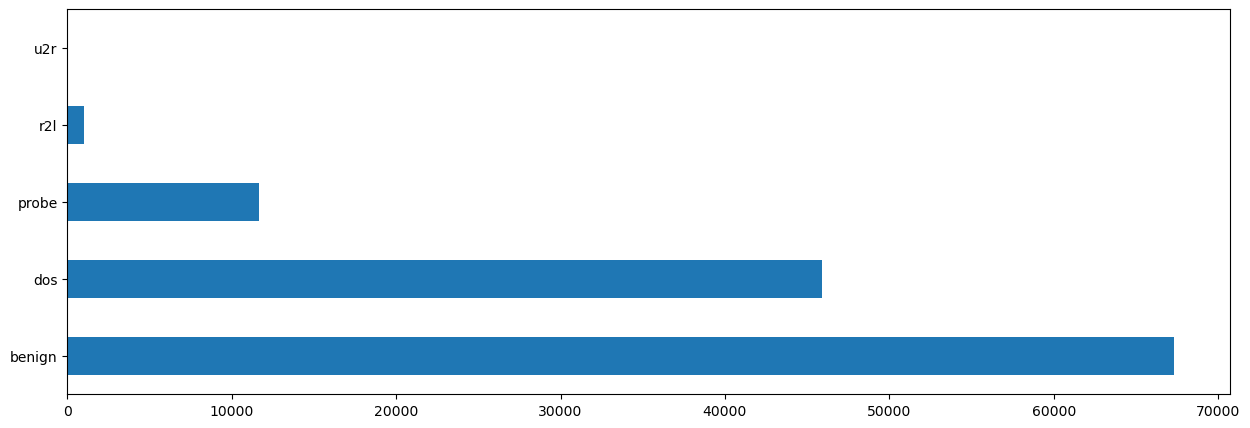

In [51]:
train_attack_cats.plot(kind='barh', figsize=(15,5), fontsize=10)

<AxesSubplot:>

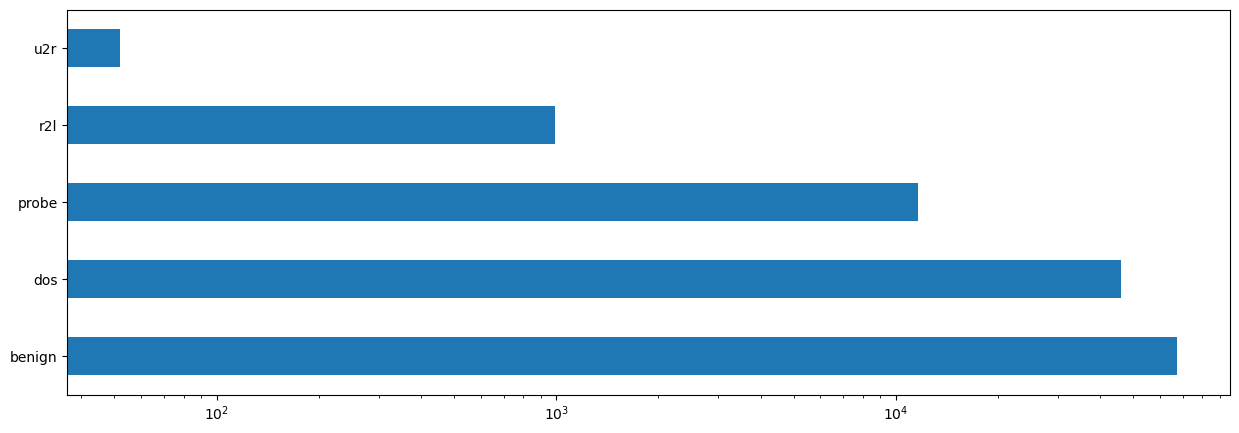

In [52]:
train_attack_cats.plot(kind='barh', logx = True,figsize=(15,5), fontsize=10)

<AxesSubplot:>

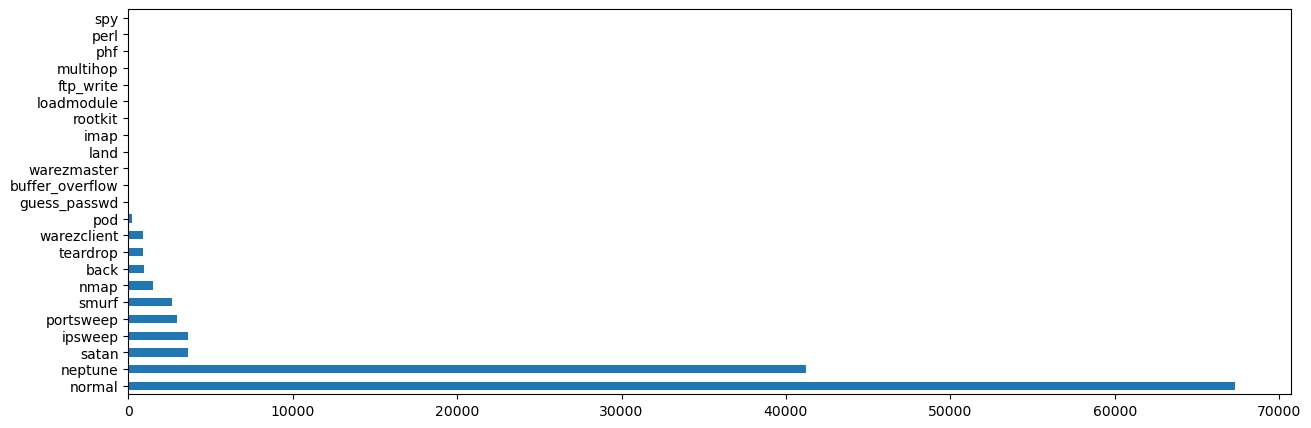

In [53]:
train_attack_types.plot(kind='barh', figsize=(15,5), fontsize=10)

<AxesSubplot:>

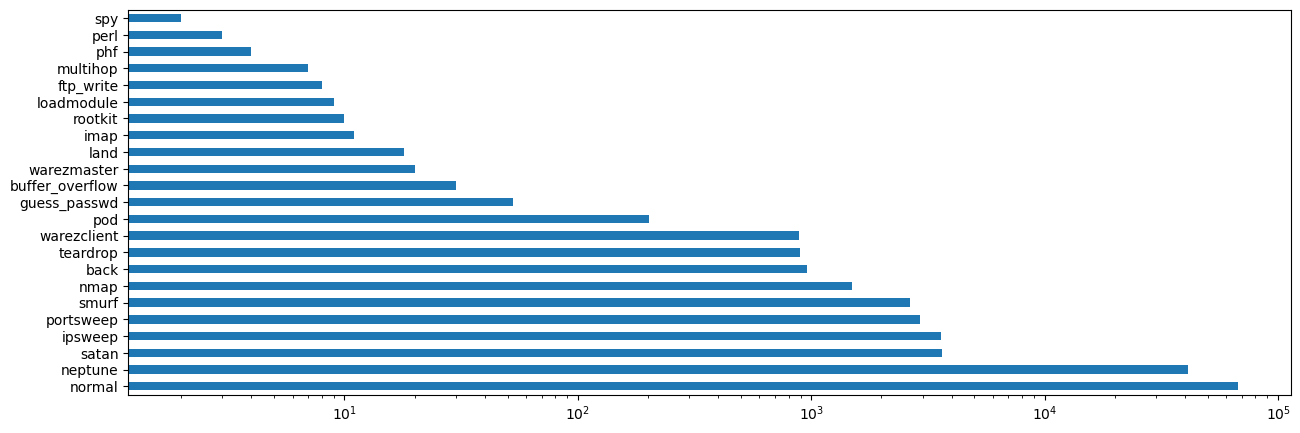

In [54]:
train_attack_types.plot(kind='barh', logx = True, figsize=(15,5), fontsize=10)

### Data cleaning

In [55]:
train_df[binary_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
land,125973.0,0.000198,0.014086,0.0,0.0,0.0,0.0,1.0
logged_in,125973.0,0.395736,0.489010,0.0,0.0,0.0,1.0,1.0
root_shell,125973.0,0.001342,0.036603,0.0,0.0,0.0,0.0,1.0
su_attempted,125973.0,0.001103,0.045154,0.0,0.0,0.0,0.0,2.0
is_host_login,125973.0,0.000008,0.002817,0.0,0.0,0.0,0.0,1.0
is_guest_login,125973.0,0.009423,0.096612,0.0,0.0,0.0,0.0,1.0


In [56]:
# The su_attempted column has a max value of 2.0

print(train_df.groupby(['su_attempted']).size())
print(test_df.groupby(['su_attempted']).size())

su_attempted
0    125893
1        21
2        59
dtype: int64
su_attempted
0    22540
1        2
2        2
dtype: int64


In [57]:
# fix this discrepancy assuming that su_attempted=2 -> su_attempted=0

train_df['su_attempted'].replace(2, 0, inplace=True)

#do the same for test set

test_df['su_attempted'].replace(2, 0, inplace=True)

print(train_df.groupby(['su_attempted']).size())
print(test_df.groupby(['su_attempted']).size())

su_attempted
0    125952
1        21
dtype: int64
su_attempted
0    22542
1        2
dtype: int64


In [23]:
train_df[numeric_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03
num_root,125973.0,0.302192,2.439962e+01,0.0,0.00,0.00,0.00,7.468000e+03
num_file_creations,125973.0,0.012669,4.839351e-01,0.0,0.00,0.00,0.00,4.300000e+01


In [58]:
# Next, we notice that the num_outbound_cmds column only takes on one value!

print(train_df.groupby(['num_outbound_cmds']).size())
print(test_df.groupby(['num_outbound_cmds']).size())

num_outbound_cmds
0    125973
dtype: int64
num_outbound_cmds
0    22544
dtype: int64


In [59]:
# Now, that's not a very useful feature - let's drop it from the dataset

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)

numeric_cols.remove('num_outbound_cmds')

## Data preparation

In [60]:
#splitting the test and training dataframes into data and labels

train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)

test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)

In [61]:
# Concatenate DataFrames
combined_df_raw = pd.concat([train_x_raw, test_x_raw])

In [62]:
# Generate dummy variables
# drop_first it helps in reducing the extra column created during dummy variable creation. 
# Hence it reduces the correlations created among dummy variables.
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

In [63]:
# Separate into training and test sets again
train_x = combined_df[:len(train_x_raw)].copy(deep=True)

test_x = combined_df[len(train_x_raw):].copy(deep=True)

In [64]:
# Keep track of dummy variables
dummy_variables = list(set(train_x)-set(combined_df_raw))

In [70]:
# standardizing the training and test data
from sklearn.preprocessing import StandardScaler

# Fit StandardScaler to the training data
standard_scaler_train = StandardScaler().fit(train_x[numeric_cols])
standard_scaler_test = StandardScaler().fit(test_x[numeric_cols])


# Standardize training data
train_x[numeric_cols] = standard_scaler_train.transform(train_x[numeric_cols])

# Standardize test data with scaler fitted to training data
test_x[numeric_cols] = standard_scaler_test.transform(test_x[numeric_cols])

In [71]:
train_x.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,1.259730e+05,1.259730e+05,1.259730e+05,125973.000000,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,125973.000000,1.259730e+05,...,125973.00000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,3.907741e-16,2.586483e-16,-3.481835e-16,0.000198,1.031855e-15,3.111230e-15,-7.604856e-15,8.220872e-16,0.395736,-2.465977e-15,...,0.08917,0.012399,0.000818,0.019218,0.276655,0.002897,0.001008,0.000389,0.594929,0.002151
std,1.000004e+00,1.000004e+00,1.000004e+00,0.014086,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.489010,1.000004e+00,...,0.28499,0.110661,0.028583,0.137292,0.447346,0.053750,0.031736,0.019719,0.490908,0.046332
min,-1.102492e-01,-7.762241e-03,-4.918644e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,0.000000,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.102492e-01,-7.762241e-03,-4.918644e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,0.000000,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.102492e-01,-7.754745e-03,-4.918644e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,0.000000,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,-1.102492e-01,-7.715224e-03,-4.790326e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,1.000000,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.636428e+01,2.350675e+02,3.257486e+02,1.000000,1.174348e+01,2.088191e+02,3.571955e+01,1.104972e+02,1.000000,3.123689e+02,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
test_x.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,2.254400e+04,2.254400e+04,2.254400e+04,22544.000000,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,22544.000000,2.254400e+04,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,-1.334927e-15,-2.071372e-17,-2.172492e-16,0.000311,-7.614162e-16,-1.056485e-16,9.295619e-16,-3.031543e-16,0.442202,2.796411e-16,...,0.170777,0.034289,0.000089,0.029675,0.089292,0.000932,0.000665,0.011045,0.659821,0.003238
std,1.000022e+00,1.000022e+00,1.000022e+00,0.017619,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,0.496659,1.000022e+00,...,0.376322,0.181973,0.009419,0.169694,0.285171,0.030507,0.025787,0.104516,0.473780,0.056813
min,-1.555341e-01,-2.198811e-02,-9.689597e-02,0.000000,-5.910394e-02,-1.945925e-02,-1.135212e-01,-1.439989e-01,0.000000,-1.649356e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.555341e-01,-2.198811e-02,-9.689597e-02,0.000000,-5.910394e-02,-1.945925e-02,-1.135212e-01,-1.439989e-01,0.000000,-1.649356e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.555341e-01,-2.187389e-02,-9.472808e-02,0.000000,-5.910394e-02,-1.945925e-02,-1.135212e-01,-1.439989e-01,0.000000,-1.649356e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,-1.555341e-01,-2.138106e-02,-6.857207e-02,0.000000,-5.910394e-02,-1.945925e-02,-1.135212e-01,-1.439989e-01,1.000000,-1.649356e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,4.086013e+01,1.328647e+02,6.333390e+01,1.000000,2.097941e+01,8.223479e+01,1.086749e+02,2.646512e+01,1.000000,1.094831e+02,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Classification

#### K fold cross validation

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold,cross_validate,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score, accuracy_score, make_scorer, f1_score
from sklearn.decomposition import PCA

#estimators = [('reduce_dim', PCA()), ('clf', LinearSVC(max_iter=10000))]

#pipe = Pipeline(estimators)

results = cross_validate(LinearSVC(max_iter=10000), train_x, train_Y, scoring = {
                                                            'fscore': make_scorer(f1_score, average = 'macro'),
                                                            'accuracy': make_scorer(accuracy_score)},
                                        return_estimator = True,
                                        cv = 5,
                                        n_jobs = -1) 
results


/home/r3d/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/r3d/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/r3d/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/r3d/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/r3d/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'fit_time': array([904.47715473, 929.00139356, 931.81356859, 925.38674998,
        205.93427444]),
 'score_time': array([0.44587588, 0.4182179 , 0.27222228, 0.45829129, 0.23378372]),
 'estimator': [LinearSVC(max_iter=10000),
  LinearSVC(max_iter=10000),
  LinearSVC(max_iter=10000),
  LinearSVC(max_iter=10000),
  LinearSVC(max_iter=10000)],
 'test_fscore': array([0.84962065, 0.77097473, 0.89761809, 0.83703384, 0.76391531]),
 'test_accuracy': array([0.9834491 , 0.98360786, 0.98293312, 0.98253552, 0.98249583])}

#### Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

accuracy = accuracy_score(pred_y, test_Y)

0.7690738112136267
              precision    recall  f1-score   support

      benign       0.67      0.97      0.80      9711
         dos       0.96      0.80      0.87      7636
       probe       0.83      0.63      0.72      2423
         r2l       0.96      0.09      0.17      2574
         u2r       0.75      0.07      0.14       200

    accuracy                           0.77     22544
   macro avg       0.83      0.51      0.54     22544
weighted avg       0.82      0.77      0.73     22544



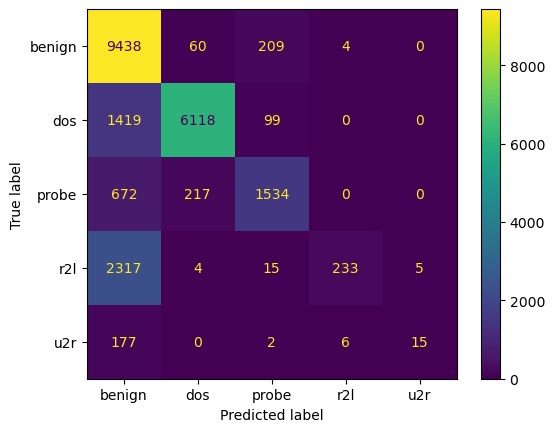

In [81]:
print(accuracy)

print(classification_report(test_Y, pred_y))

ConfusionMatrixDisplay.from_predictions(test_Y, pred_y)

In [82]:
test_Y.value_counts().apply(lambda x: x/float(len(test_Y)))

benign    0.430758
dos       0.338715
r2l       0.114177
probe     0.107479
u2r       0.008872
Name: attack_category, dtype: float64

#### K-nearest neighbors classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

accuracy = accuracy_score(pred_y, test_Y)

/home/r3d/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [97]:
import sklearn

sklearn.__version__

'1.0.2'

0.7579400283889283
              precision    recall  f1-score   support

      benign       0.66      0.97      0.79      9711
         dos       0.96      0.77      0.86      7636
       probe       0.84      0.66      0.74      2423
         r2l       0.93      0.05      0.09      2574
         u2r       0.24      0.07      0.10       200

    accuracy                           0.76     22544
   macro avg       0.73      0.50      0.52     22544
weighted avg       0.81      0.76      0.72     22544



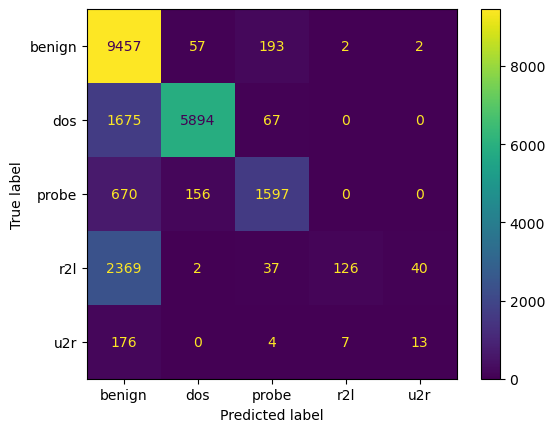

In [84]:
print(accuracy)

print(classification_report(test_Y, pred_y))

ConfusionMatrixDisplay.from_predictions(test_Y, pred_y)

#### Linear Support Vector Classifier


In [85]:
# LinearSVC more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
from sklearn.svm import LinearSVC

classifier = LinearSVC()
classifier.fit(train_x, train_Y)

accuracy = accuracy_score(pred_y, test_Y)

/home/r3d/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7579400283889283
              precision    recall  f1-score   support

      benign       0.66      0.97      0.79      9711
         dos       0.96      0.77      0.86      7636
       probe       0.84      0.66      0.74      2423
         r2l       0.93      0.05      0.09      2574
         u2r       0.24      0.07      0.10       200

    accuracy                           0.76     22544
   macro avg       0.73      0.50      0.52     22544
weighted avg       0.81      0.76      0.72     22544



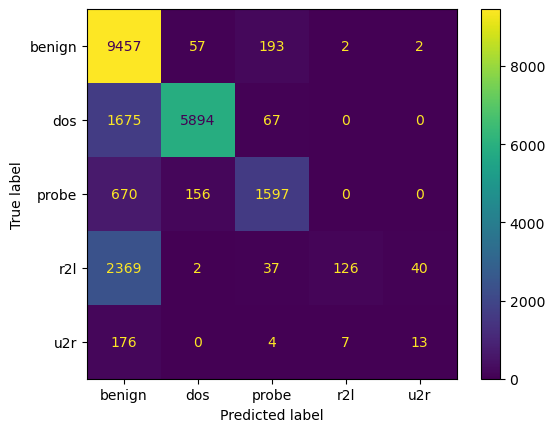

In [86]:
print(accuracy)

print(classification_report(test_Y, pred_y))

ConfusionMatrixDisplay.from_predictions(test_Y, pred_y)

### Manage Class imbalance

In [87]:
print(pd.Series(train_Y).value_counts())

benign    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: attack_category, dtype: int64


In [88]:
# oversampling
from imblearn.over_sampling import SMOTE

# Apply SMOTE oversampling to the training data
sm = SMOTE(random_state=0)
train_x_sm, train_Y_sm = sm.fit_resample(train_x, train_Y)

print(pd.Series(train_Y_sm).value_counts())

benign    67343
dos       67343
r2l       67343
probe     67343
u2r       67343
Name: attack_category, dtype: int64


In [91]:
# undersampling
from imblearn.under_sampling import RandomUnderSampler

mean_class_size = int(pd.Series(train_Y).value_counts().sum()/5)

sampling_strategy = {
'benign': mean_class_size,
'dos': mean_class_size,
'probe': mean_class_size,
'r2l': mean_class_size,
'u2r': mean_class_size}

rus = RandomUnderSampler(sampling_strategy= sampling_strategy, random_state= 0, replacement= True)

train_x_rus, train_Y_rus = rus.fit_resample(train_x_sm, train_Y_sm)

print(pd.Series(train_Y_rus).value_counts())

benign    25194
dos       25194
probe     25194
r2l       25194
u2r       25194
Name: attack_category, dtype: int64


### Repeat classification, reshape classifiers

#### Decision Tree Classifier - balanced class

0.765791341376863
              precision    recall  f1-score   support

      benign       0.72      0.97      0.82      9711
         dos       0.96      0.71      0.81      7636
       probe       0.63      0.85      0.72      2423
         r2l       0.87      0.15      0.25      2574
         u2r       0.42      0.08      0.13       200

    accuracy                           0.77     22544
   macro avg       0.72      0.55      0.55     22544
weighted avg       0.80      0.77      0.74     22544



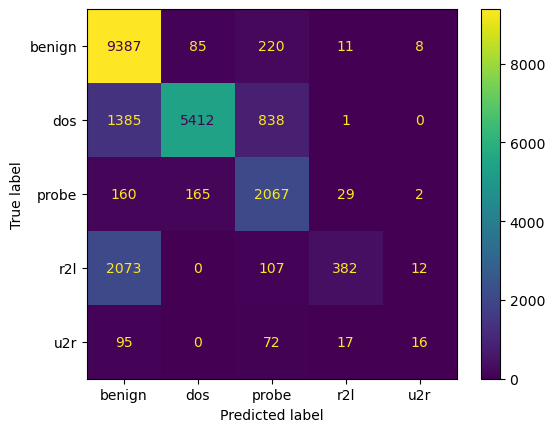

In [94]:
classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x_rus, train_Y_rus)
pred_y = classifier.predict(test_x)

accuracy = accuracy_score(pred_y, test_Y)

print(accuracy)

print(classification_report(test_Y, pred_y))

ConfusionMatrixDisplay.from_predictions(test_Y, pred_y)

#### K-nearest neighbors classifier - balanced class

/home/r3d/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7687189496096523
              precision    recall  f1-score   support

      benign       0.68      0.97      0.80      9711
         dos       0.96      0.78      0.86      7636
       probe       0.79      0.74      0.76      2423
         r2l       0.83      0.07      0.13      2574
         u2r       0.21      0.09      0.13       200

    accuracy                           0.77     22544
   macro avg       0.69      0.53      0.54     22544
weighted avg       0.80      0.77      0.73     22544



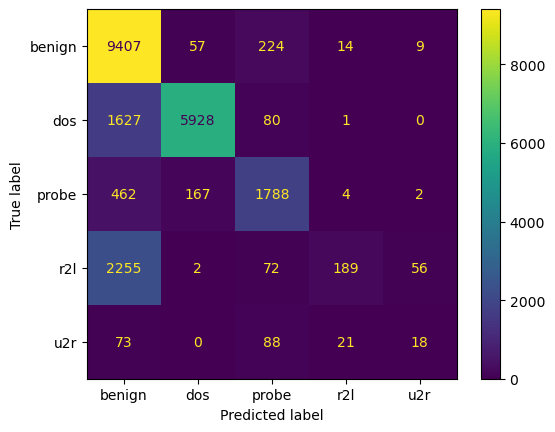

In [95]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(train_x_rus, train_Y_rus)

pred_y = classifier.predict(test_x)

accuracy = accuracy_score(pred_y, test_Y)

print(accuracy)

print(classification_report(test_Y, pred_y))

ConfusionMatrixDisplay.from_predictions(test_Y, pred_y)

#### Linear Support Vector Classifier - balanced class


/home/r3d/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7687189496096523
              precision    recall  f1-score   support

      benign       0.68      0.97      0.80      9711
         dos       0.96      0.78      0.86      7636
       probe       0.79      0.74      0.76      2423
         r2l       0.83      0.07      0.13      2574
         u2r       0.21      0.09      0.13       200

    accuracy                           0.77     22544
   macro avg       0.69      0.53      0.54     22544
weighted avg       0.80      0.77      0.73     22544



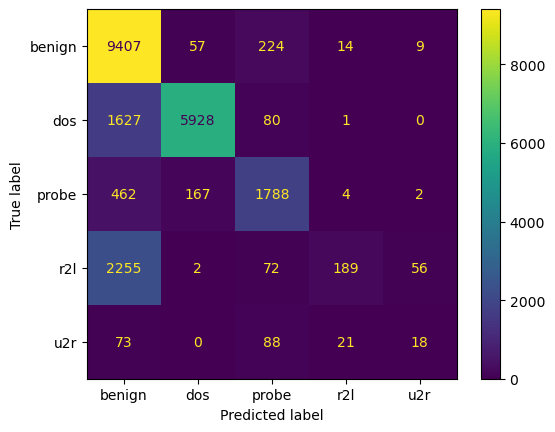

In [96]:
classifier = LinearSVC()
classifier.fit(train_x, train_Y)

accuracy = accuracy_score(pred_y, test_Y)

print(accuracy)

print(classification_report(test_Y, pred_y))

ConfusionMatrixDisplay.from_predictions(test_Y, pred_y)